In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

### knapsack

In [2]:
opt = 'GA'
p=100
ma=50
mu=25
cpfile = 'kn/kn-%s-%d-%d-%d.csv' % (opt, p, ma, mu)
ga = pd.read_csv(cpfile, names=["i", "score", "elapsed"])
ga["p"] = p
ga["ma"] = ma
ga["mu"] = mu
ga["params"] = "pop=%d, mate=%d, mutate=%d" % (p, ma, mu)
ga["opt"] = opt

In [3]:
opt = 'MMC'
s=100
k=10
cpfile = 'kn/kn-%s-%d-%d.csv' % (opt, s, k)
mmc = pd.read_csv(cpfile, names=["i", "score", "elapsed"])
mmc["samples"] = s
mmc["tokeep"] = k
mmc["params"] = "samples=%d, tokeep=%d" % (s, k)
mmc["opt"] = "MIMIC"

In [4]:
opt = 'RHC'
i=10000
t=1
cpfile = 'kn/kn-%s-%d-%d.csv' % (opt, i, t)
rhc = pd.read_csv(cpfile, names=["i", "score", "elapsed"])
rhc["iterations"] = i
rhc["try"] = t
rhc["params"] = "iterations=%d, try=%d" % (i, t)
rhc["opt"] = opt

In [5]:
opt = 'SA'
t="1E10"
c="0.75"
cpfile = 'kn/kn-%s-%s-%s.csv' % (opt, t, c)
sa = pd.read_csv(cpfile, names=["i", "score", "elapsed"])
sa["t"] = t
sa["cooling"] = c
sa["params"] = "t=%s, cooling=%s" % (t, c)
sa["opt"] = opt

In [6]:
cp = pd.DataFrame()
opt = 'GA'
for p in [200, 100]:
    for ma in [100, 50, 10]:
        for mu in [25, 10]:
            cpfile = 'kn/kn-%s-%d-%d-%d.csv' % (opt, p, ma, mu)
            tmp = pd.read_csv(cpfile, names=["i", "score", "elapsed"])
            tmp["p"] = p
            tmp["ma"] = ma
            tmp["mu"] = mu
            tmp["params"] = "pop=%d, mate=%d, mutate=%d" % (p, ma, mu)
            if cp.shape[0] == 0:
                cp = tmp.copy(deep=True)
            else:
                cp = cp.append(tmp)

In [7]:
cp = pd.DataFrame()
opt = 'MMC'
for s in [200, 100]:
    #for ma in [100, 50, 10]:
        for k in [50, 20, 10]:
            cpfile = 'kn/kn-%s-%d-%d.csv' % (opt, s, k)
            tmp = pd.read_csv(cpfile, names=["i", "score", "elapsed"])
            tmp["samples"] = s
            tmp["tokeep"] = k
            tmp["params"] = "samples=%d, tokeep=%d" % (s, k)
            tmp["opt"] = "MIMIC"
            if cp.shape[0] == 0:
                cp = tmp.copy(deep=True)
            else:
                cp = cp.append(tmp)

In [8]:
cp = pd.DataFrame()
opt = 'RHC'
for i in [20000, 10000]:
    #for ma in [100, 50, 10]:
        for t in [1,2,3,4,5]:
            cpfile = 'kn/kn-%s-%d-%d.csv' % (opt, i, t)
            tmp = pd.read_csv(cpfile, names=["i", "score", "elapsed"])
            tmp["iterations"] = i
            tmp["try"] = t
            tmp["params"] = "iterations=%d, try=%d" % (i, t)
            tmp["opt"] = opt
            if cp.shape[0] == 0:
                cp = tmp.copy(deep=True)
            else:
                cp = cp.append(tmp)

In [9]:
cp = pd.DataFrame()
opt = 'SA'
for t in ["1E10"]:
    #for ma in [100, 50, 10]:
        for c in ["0.15", "0.35", "0.55", "0.75", "0.95"]:
            cpfile = 'kn/kn-%s-%s-%s.csv' % (opt, t, c)
            tmp = pd.read_csv(cpfile, names=["i", "score", "elapsed"])
            tmp["t"] = t
            tmp["cooling"] = c
            tmp["params"] = "t=%s, cooling=%s" % (t, c)
            tmp["opt"] = opt
            if cp.shape[0] == 0:
                cp = tmp.copy(deep=True)
            else:
                cp = cp.append(tmp)

In [10]:
cp.loc[cp["score"] == cp["score"].max(),["params"]].groupby(["params"]).size()

params
t=1E10, cooling=0.75    985
dtype: int64

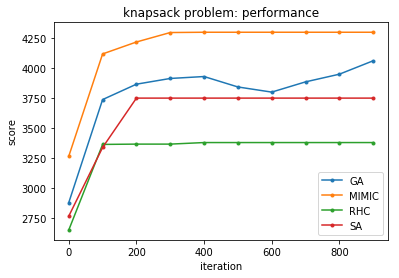

In [11]:
legend = []
for out in [ga, mmc, rhc, sa]:
    ind = np.array(range(100)) % 10 == 0
    x = out.iloc[ind,0]
    y = out.iloc[ind,1]
    plt.plot(x, y, '.-')
    legend.append(out.iloc[0,-1])

plt.legend(legend, loc="best")
plt.ylabel('score')
plt.xlabel('iteration')
plt.title('knapsack problem: performance')
plt.gcf()
plt.savefig('knscore.png')
plt.show()

In [6]:
for out in [ga]:#, mmc, rhc, sa]:
    print out.index.values.max()

99
